In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ironhack-final-project')

In [4]:
import you_nlp

In [5]:
us = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/USvideos_final_cleaned.csv")
ca = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/CAvideos_final_cleaned.csv")
gb = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/GBvideos_final_cleaned.csv")


In [6]:
data = pd.concat([us, ca, gb], axis = 0)

In [7]:
data

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,thumbnail_link,raw_language,cleaned_text,likes_rate,dislikes_rate
0,2kyS6SvSYSE,17.14.11,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,en,we want to talk about our marriageshantell mar...,0.076869,0.003963
1,1ZAPwfrtAFY,17.14.11,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,en,the trump presidency last week tonight with jo...,0.040179,0.002541
2,5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,en,racist superman rudy mancuso king bach lele po...,0.045758,0.001673
3,puqaWrEC7tY,17.14.11,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,en,nickelback lyrics real or fake rhett and link ...,0.029641,0.001941
4,d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,en,i dare you going bald ryan higa higatv nigahig...,0.063097,0.000949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38911,l884wKofd54,18.14.06,10,2018-05-09T07:00:01.000Z,25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,en,enrique iglesias move to miami official video ...,0.010695,0.000510
38912,IP8k2xkhOdI,18.14.06,10,2018-05-11T17:09:16.000Z,1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,en,jacob sartorius up with it official music vide...,0.041548,0.009235
38913,Il-an3K9pjg,18.14.06,10,2018-05-08T11:05:08.000Z,29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,en,anne marie official video anne marie anne mari...,0.013320,0.000300
38914,-DRsfNObKIQ,18.14.06,24,2018-05-08T20:32:32.000Z,14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,en,eleni foureira fuego cyprus live first semi fi...,0.010607,0.003204


In [8]:
data_nlp, frq = you_nlp.get_key_words(data, "en")

In [9]:
stop_words = list(stopwords.words('english')) 

In [11]:
key_word_df, final_freq = you_nlp.create_keywords_df(data_nlp, frq, stop_words, "English_Native")

In [12]:
final_freq

[('new', 64658),
 ('nfollow', 46457),
 ('news', 42224),
 ('video', 40730),
 ('youtube', 37522),
 ('live', 33013),
 ('facebook', 31319),
 ('instagram', 29707),
 ('ntwitter', 28614),
 ('subscribe', 28479),
 ('nsubscribe', 27485),
 ('ninstagram', 27435),
 ('nfacebook', 26357),
 ('best', 24372),
 ('movie', 23600),
 ('late', 23311),
 ('nthe', 21927),
 ('makeup', 20750),
 ('nwatch', 18327),
 ('com', 17367),
 ('use', 15955),
 ('latest', 15762),
 ('every', 15278),
 ('film', 14899),
 ('nlike', 14719),
 ('jimmy', 14219),
 ('james', 14173),
 ('follow', 13383),
 ('nget', 12887),
 ('war', 12818),
 ('nmusic', 12739),
 ('series', 12277),
 ('highlight', 11884),
 ('got', 11871),
 ('free', 11823),
 ('nbc', 11500),
 ('sport', 11483),
 ('christmas', 11367),
 ('online', 11282),
 ('song', 11276),
 ('team', 11072),
 ('thing', 10800),
 ('available', 10563),
 ('celebrity', 10543),
 ('made', 10285),
 ('big', 10140),
 ('nba', 10065),
 ('also', 10013),
 ('ever', 9937),
 ('game', 9714),
 ('episode', 9704)]

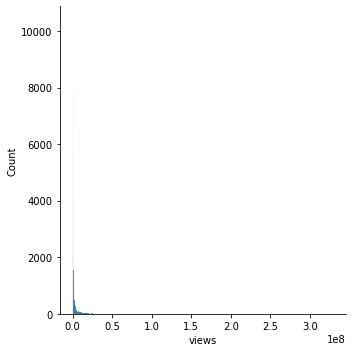

In [13]:
sns.displot(key_word_df["views"])

In [14]:
key_word_df_outl = you_nlp.remove_outliers(key_word_df)

category_id
14.0
45.0
-11.0
views
1662356.25
4363126.125
-2286298.875
likes
52501.75
135782.375
-74224.625
dislikes
1752.0
4543.0
-2465.0
comment_count
5211.0
13622.5
-7221.5
likes_rate
0.0328232932775726
0.09592707093620355
-0.035366102174086846
dislikes_rate
0.000965837420205375
0.0029228463191145124
-0.0009405033617069876
new
1.0
2.5
-1.5
nfollow
news
video
2.0
5.0
-3.0
youtube
live
facebook
instagram
ntwitter
subscribe
nsubscribe
ninstagram
nfacebook
best
movie
late
nthe
makeup
nwatch
com
use
latest
every
film
nlike
jimmy
james
follow
nget
war
nmusic
series
highlight
got
free
nbc
sport
christmas
online
song
team
thing
available
celebrity
made
big
nba
also
ever
game
episode
0 rows have been removed, 0.0% in total


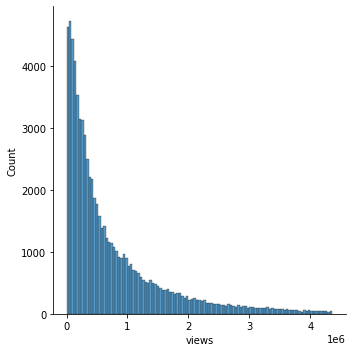

In [15]:
sns.displot(key_word_df_outl["views"])

In [16]:
key_word_df_outl["views"].describe()

count    7.295600e+04
mean     7.349065e+05
std      8.214447e+05
min      5.490000e+02
25%      1.644060e+05
50%      4.239155e+05
75%      1.000523e+06
max      4.362716e+06
Name: views, dtype: float64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


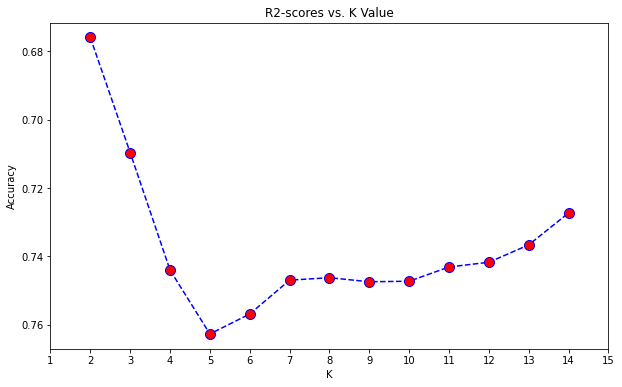

Please enter k:5


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8016137047445746
MSE: 12232118087.101221
RMSE: 110598.90635580996
MAE: 26251.62365548671
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7968730996608189
MSE: 14262934724.473164
RMSE: 119427.52917344126
MAE: 29717.376893359553
-----------------------------
Filename Linear: English_Native_Likes_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.08913130671466052
MSE: 56162414867.23943
RMSE: 236986.10690764012
MAE: 96219.76858000158
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.09418146062753818
MSE: 63603740704.52438
RMSE: 252197.82057845857
MAE: 99253.64325627849
-----------------------------
Filename Linear: Englis

In [17]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes", "English_Native_Likes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


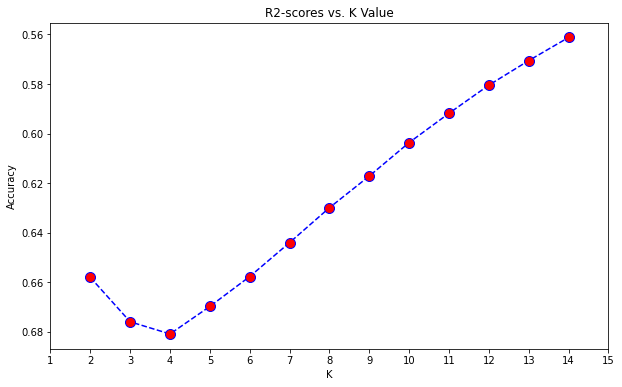

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8475500876790347
MSE: 98827625.20118915
RMSE: 9941.208437669393
MAE: 4785.441932931796
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7690030075619635
MSE: 147069233.12613606
RMSE: 12127.210442889827
MAE: 6169.638424748301
-----------------------------
Filename Linear: English_Native_Likes_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.10606958525076704
MSE: 579501940.2751821
RMSE: 24072.846534533095
MAE: 17003.23354437735
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.10889366512565801
MSE: 567342128.2269108
RMSE: 23818.944733696975
MAE: 16878.29751423201
-----------------------------
Filename Linear: Engli

In [18]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes", "English_Native_Likes_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


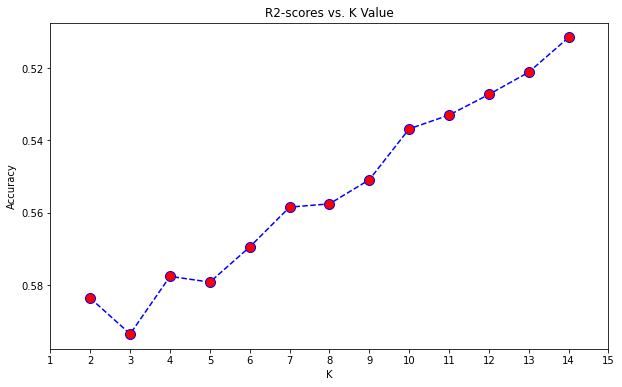

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7745675444300067
MSE: 0.00017794065810258859
RMSE: 0.013339439947111295
MAE: 0.006669236410843545
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.691619827032901
MSE: 0.00023876380632312927
RMSE: 0.015451983896028667
MAE: 0.008289808963843485
-----------------------------
Filename Linear: English_Native_Likes_Rate_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.14633160252272948
MSE: 0.0006738262956166239
RMSE: 0.02595816433449453
MAE: 0.018582075703489725
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.1509624924824059
MSE: 0.000657368549526144
RMSE: 0.025639199471242154
MAE: 0.01853928464104283
------------------

In [19]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes_rate", "English_Native_Likes_Rate")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


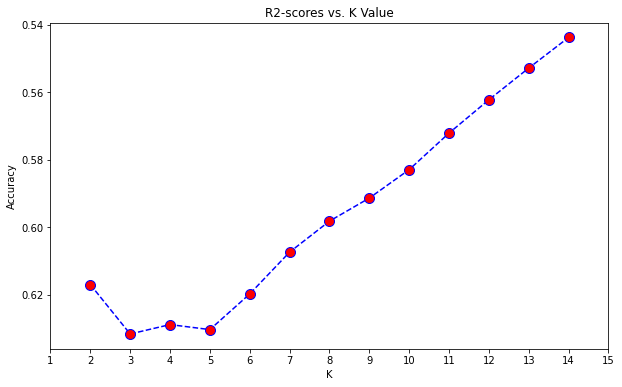

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8484329690702443
MSE: 6.862644655148381e-05
RMSE: 0.008284108072175531
MAE: 0.004673627242464307
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7428501558800695
MSE: 0.00011524155379619926
RMSE: 0.010735061890655278
MAE: 0.006264867477261229
-----------------------------
Filename Linear: English_Native_Likes_Rate_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.2033759907781404
MSE: 0.00036069503146650325
RMSE: 0.018991972816600786
MAE: 0.014978833930158215
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.20667449875331056
MSE: 0.0003555283641827853
RMSE: 0.018855459797702766
MAE: 0.014864977093833706
----------

In [21]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes_rate", "English_Native_Likes_Rate_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


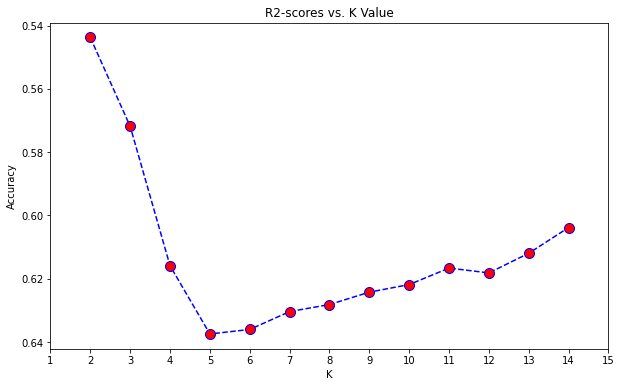

Please enter k:5


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.6948640026073891
MSE: 31140851516695.26
RMSE: 5580398.8671684805
MAE: 1314322.9870973467
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.6758562859513542
MSE: 35631144947896.74
RMSE: 5969182.938049122
MAE: 1480842.4894427608
-----------------------------
Filename Linear: English_Native_Views_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.06722002606427524
MSE: 95195463381216.55
RMSE: 9756816.252303645
MAE: 3550678.3079113928
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.07395847303465586
MSE: 101794106888409.2
RMSE: 10089306.56132567
MAE: 3631024.2240616777
-----------------------------
Filename Linear: English_

In [22]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "views", "English_Native_Views")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


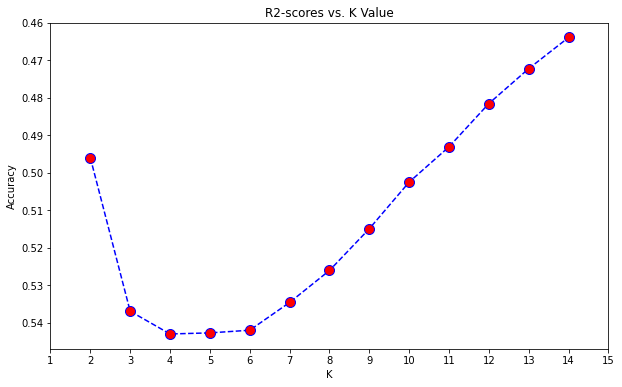

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7478628254531061
MSE: 172276336764.10785
RMSE: 415061.8469145386
MAE: 227445.41943486288
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.648543812261352
MSE: 230132827218.2886
RMSE: 479721.6142913394
MAE: 279892.53376640624
-----------------------------
Filename Linear: English_Native_Views_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.07062997315679942
MSE: 635005385503.4742
RMSE: 796872.2516837151
MAE: 585216.962207572
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.0697698390121484
MSE: 609112897653.8348
RMSE: 780456.8518847374
MAE: 575922.5519576368
-----------------------------
Filename Linear: English_N

In [25]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "views", "English_Native_Views_Out")

In [ ]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[5 , 10, 15]
min_sample_leaf=[5, 10, 15]
max_samples=[0.2, 0.6, 0.8, 0.9]
random_state=[5, 10, 13]

In [ ]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }